In [1]:
import numpy as np
import cv2 as cv
import cv2
%matplotlib inline
import matplotlib.pyplot as plt




# Трансформация

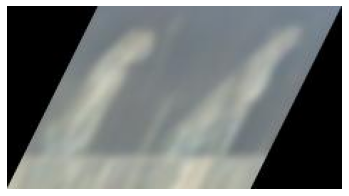

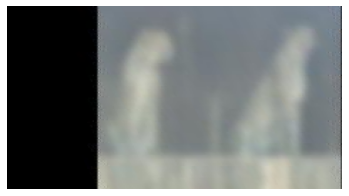

In [2]:
# read the input image
img = cv2.imread("input2.jpg")
# convert from BGR to RGB so we can plot using matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# disable x & y axis
plt.axis('off')
# show the image
plt.imshow(img)
plt.show()
# get the image shape
rows, cols, dim = img.shape
# transformation matrix for Shearing
# shearing applied to x-axis
M = np.float32([[1, 0.5, 0],
[0, 1 , 0],
[0, 0 , 1]])
# apply a perspective transformation to the image
sheared_img = cv2.warpPerspective(img,M,(int(cols),int(rows)))
# disable x & y axis
plt.axis('off')
# show the resulting image
plt.imshow(sheared_img)
plt.show()

# Кадрирование

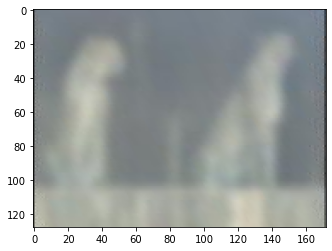

In [3]:
rows, cols, dim = sheared_img.shape

ROI = ( int(cols*0.27), 0, cols, rows) #(x0, y0, height, width)
cropped_image = sheared_img[ROI[1]:ROI[1] + ROI[3], ROI[0]:ROI[0] + ROI[2]]
plt.imshow(cropped_image)

# Восстановление

In [4]:




# Определение ядра для повышения резкости (например, фильтр Гаусса)
kernel = np.array([[0, 0, 0],
[0, 1, 0],
[0, 0, 0]])

# Применение фильтра для повышения резкости
img_output= cv2.filter2D(cropped_image, -1, kernel)




from skimage import io, img_as_ubyte, filters

# Загрузка изображения
#image = io.imread('2.jpg')
image = cropped_image

#image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
#clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
#image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
#image = clahe.apply(image)


contrast = cv2.convertScaleAbs(image,alpha=-1,beta = 300)


# Применение фильтра "Unsharp Mask" для повышения резкости
sharpened_image = filters.unsharp_mask(contrast, radius=4, amount=2)

# Преобразование изображения к формату uint8
sharpened_image_uint8 = img_as_ubyte(sharpened_image)

# Сохранение результата
io.imsave('sharpened_image1.jpg', sharpened_image_uint8)



C:\Users\dubin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\dubin\anaconda3\lib\site-packages\skimage\_shared\utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


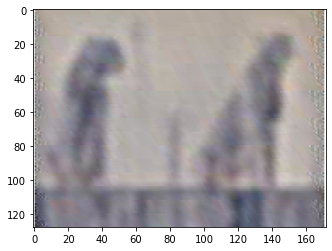

In [5]:

plt.imshow(sharpened_image)
plt.show()